## SUSAN

El método SUSAN (Smallest Univalue Segment Assimilating Nucleus) es un algoritmo de detección de bordes y esquinas en imágenes. Funciona evaluando cada píxel y comparándolo con sus vecinos dentro de una región circular llamada "núcleo".

#### Máscara de SUSAN: 
Se define una máscara de 7x7 píxeles para el área alrededor de cada píxel en la imagen. La máscara contiene 37 píxeles en total que se utilizarán en el cálculo.

#### Área USAN (Univalue Segment Assimilating Nucleus): 
Para cada píxel de la imagen, se compara la intensidad del píxel central con la intensidad de los píxeles vecinos dentro de la máscara. Se cuenta cuántos píxeles tienen intensidades similares al píxel central (diferencia menor que el umbral t). Este número de píxeles similares es el área USAN.

#### Detección de bordes: 
Si el área USAN es menor que g * 37 y mayor que 0.5 * 37, el píxel se marca como borde.

#### Detección de esquinas: 
Si el área USAN es menor o igual a 0.5 * 37, el píxel se marca como esquina.

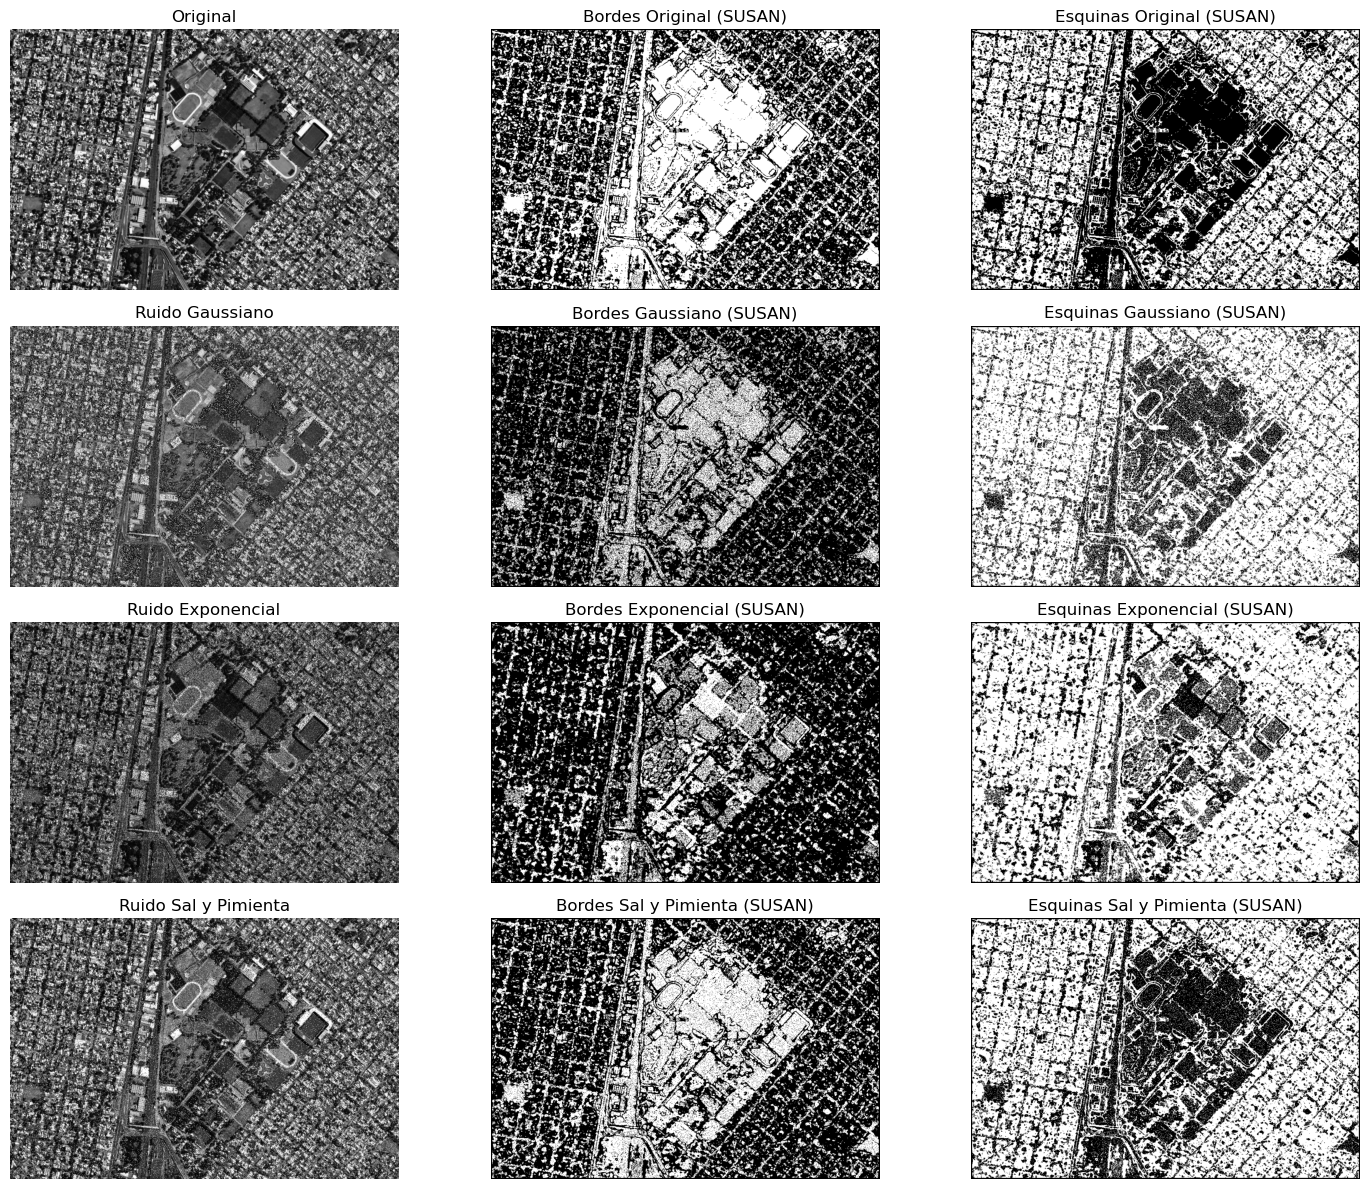

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función SUSAN para detección de bordes y esquinas
def susan_detector(imagen, t=27, g=3.7):
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    mascara = np.array([
        [0, 0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 0, 0]
    ], dtype=np.uint8)

    bordes = np.zeros_like(imagen, dtype=np.uint8)
    esquinas = np.zeros_like(imagen, dtype=np.uint8)

    filas, columnas = imagen.shape

    for i in range(3, filas - 3):
        for j in range(3, columnas - 3):
            intensidad_central = np.int16(imagen[i, j])
            us = 0

            for mi in range(-3, 4):
                for mj in range(-3, 4):
                    if mascara[mi + 3, mj + 3] == 1:
                        intensidad_vecina = np.int16(imagen[i + mi, j + mj])
                        if abs(intensidad_central - intensidad_vecina) < t:
                            us += 1

            if us < (g * 37) and us > 0.5 * 37:
                bordes[i, j] = 255

            if us <= 0.5 * 37:
                esquinas[i, j] = 255

    return bordes, esquinas

# Funciones para agregar diferentes tipos de ruido
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_exponential_noise(image, scale, contamination_percentage):
    exponential_noise = np.random.exponential(scale, image.shape)
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] * exponential_noise[mask]
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = 255

    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = 0

    return imagen_ruido

# Cargar la imagen original
imagen = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)

# Generar las versiones ruidosas de la imagen
imagen_ruido_gaussiano = add_gaussian_noise(imagen, 0, 25, 70)
imagen_ruido_exponencial = add_exponential_noise(imagen, 1.0, 50)
imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(imagen, 0.1)

# Aplicar el detector SUSAN a cada versión de la imagen
bordes_original, esquinas_original = susan_detector(imagen)
bordes_gaussiano, esquinas_gaussiano = susan_detector(imagen_ruido_gaussiano)
bordes_exponencial, esquinas_exponencial = susan_detector(imagen_ruido_exponencial)
bordes_sal_pimienta, esquinas_sal_pimienta = susan_detector(imagen_ruido_sal_pimienta)

# Mostrar los resultados
plt.figure(figsize=(15, 12))

# Imagen original
plt.subplot(4, 3, 1)
plt.title("Original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.title("Bordes Original (SUSAN)")
plt.imshow(bordes_original, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.title("Esquinas Original (SUSAN)")
plt.imshow(esquinas_original, cmap='gray')
plt.axis('off')

# Imagen con ruido gaussiano
plt.subplot(4, 3, 4)
plt.title("Ruido Gaussiano")
plt.imshow(imagen_ruido_gaussiano, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.title("Bordes Gaussiano (SUSAN)")
plt.imshow(bordes_gaussiano, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.title("Esquinas Gaussiano (SUSAN)")
plt.imshow(esquinas_gaussiano, cmap='gray')
plt.axis('off')

# Imagen con ruido exponencial
plt.subplot(4, 3, 7)
plt.title("Ruido Exponencial")
plt.imshow(imagen_ruido_exponencial, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.title("Bordes Exponencial (SUSAN)")
plt.imshow(bordes_exponencial, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.title("Esquinas Exponencial (SUSAN)")
plt.imshow(esquinas_exponencial, cmap='gray')
plt.axis('off')

# Imagen con ruido sal y pimienta
plt.subplot(4, 3, 10)
plt.title("Ruido Sal y Pimienta")
plt.imshow(imagen_ruido_sal_pimienta, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.title("Bordes Sal y Pimienta (SUSAN)")
plt.imshow(bordes_sal_pimienta, cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.title("Esquinas Sal y Pimienta (SUSAN)")
plt.imshow(esquinas_sal_pimienta, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



### Conclusiones

##### 1- Imagen Original
- **Bordes**: La detección de bordes en la imagen original se ve bastante clara y precisa. Las estructuras principales, como edificios, calles y grandes áreas, se destacan adecuadamente.
- **Esquinas**: Las esquinas detectadas son coherentes y se ubican en puntos relevantes, donde se encuentran las intersecciones de bordes en las estructuras.

##### 2- Ruido Gaussiano
- **Bordes**: La detección de bordes es más difusa en comparación con la imagen original. Aunque las estructuras principales aún se destacan, el ruido gaussiano ha introducido bordes adicionales no deseados. En este caso la parte del centro donde se encuentra la cancha se ve mas difuminada y no se ven bien los bordes.
- **Esquinas**: La detección de esquinas es menos precisa debido al ruido. Hay más detecciones en áreas que no corresponden a intersecciones reales de bordes.

##### 3- Ruido Exponencial
- **Bordes**: La imagen muestra una gran cantidad de bordes adicionales, generando una apariencia más caótica alrededor de las casas. Aunque algunas estructuras importantes son visibles, el ruido exponencial afecta más notablemente la precisión de los bordes. 
- **Esquinas**: La detección de esquinas se ve significativamente afectada. Muchas áreas que deberían ser homogéneas ahora tienen detecciones de esquinas falsas. 

##### 4- Ruido Sal y Pimienta
- **Bordes**: El ruido sal y pimienta afecta de manera notable la detección de bordes. Aunque algunas estructuras principales aún se distinguen, la presencia de puntos blancos y negros aleatorios produce muchos bordes falsos.
- **Esquinas**: La detección de esquinas es la más afectada en esta versión. La cantidad de detecciones es alta y aparecen en áreas sin estructura.

Por lo que podemos ver, el método SUSAN funciona bien en la imagen original, pero su efectividad disminuye en presencia de ruido, especialmente cuando los cambios de intensidad son bruscos y aleatorios, como en el caso del ruido sal y pimienta y el ruido exponencial.
